# Project: Investigate a Dataset - The Movie Database (TMDb)

## Introduction

In a fiction world, Our company has the intention to make a step into the cinematic industry. 

Because this is a whole new world to us, as a data analyst, it would be essential to provide an overall picture of the industry as well as multiple scenarios for the best preparation.

The upcoming analysis would focus on the commercial aspect of the issuance of a movie as the BoD would like to see a good profit for their investment into this new field.

# Data in use

The data set to be used for this analysis contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
- There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them.
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


# Questions for Analysis

- __*Question 1:*__ How do revenue, budget, gross profit and gross profit margin vary throughout years?
- __*Question 2:*__ Which are top 10 genres had succeeded in commercial aspects, in terms of revenue, budget, and gross profit?
- __*Question 3:*__ How runtime of a movie effect on the revenue of a movie?
- __*Question 4:*__ Does the vote effect the revenue of the movie?
- __*Question 5:*__ Which are the top 10 directors who are most frequently directed of all time?
- __*Question 6:*__ Which are the top 10 frequent actors/actresses and their corresponding commercial performance?


In [2]:
#Import statement for this project
import pandas as pd #Import pandas library
import numpy as np #import numpy library
import matplotlib.pyplot as plt #import pyplot library for visualization
%matplotlib inline 

# Data Wrangling

## General properties

__Check overall quality of dataset__

In [2]:
#Load data "tmdb-movies.csv"
movies = pd.read_csv('./tmdb-movies.csv')
print(movies.info())
movies.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Drop columns which would not be used for further analysis
drop_cols = ['id','imdb_id','homepage','tagline','keywords','overview','production_companies']

movies.drop(drop_cols, axis = 1, inplace = True),

(None,)

In [4]:
#Because all columns having null values is in string type, so that all these columns should be filtered out from the dataset
movies.dropna(axis = 0, inplace = True)
print(movies.isnull().sum())

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64


__Check data type__

_*For the "budget_adj" and "revenue_adj" columns*_
- Because the dataset is a collection of information through many years, the budget and revenue index must be converted into one consistent currenty as at one specific time
- The buget_adj and revenue_adj columns show show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
- For the ease of analysis, the data type of "budget_adj" and "revenue_adj" columns would be converted into integer, instead of the current float type

In [5]:
# Convert data type of "budget_adj" and "revenue_adj" from float type into integer type

movies[['budget_adj','revenue_adj']] = movies[['budget_adj','revenue_adj']].astype('int64')

In [6]:
# The release_date column is not in the appropriate data type which should be datetime, instead of string
# Convert the string type of "release_date" column into datetime type
movies['release_date'] = pd.to_datetime(movies['release_date'])

- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters and this could  not help to analyse futher

In [7]:
#Seperate each cast or genres into one row in the dataset.
def explode_cols(df, expl_cols):
    for col in expl_cols:
        df[col] = df[col].astype(str)
        df[col] = df[col].apply(lambda x: x.split('|'))
        df = df.explode(col, ignore_index = True)
    return df
        
expl_cols = ['cast','genres']
movies = explode_cols(movies,expl_cols)

__Enrich columns into the dataset for analysis purposes__

- Because this report would present the commercial aspect of the issuance of a movie, therefore, only two "revenue" and "budget" columns could not illustrate adequate information for the analysis.
- Accordingly, it would come up with two new columns as follows;
    + Gross profit: is the profit made after deducting the costs associated with making and issuing a movies. This column would be calculated by subtracting the budget from revenue.
    + Gross profit margin: is a measure of profitability of the issuance of a movie. It is calculated by finding the profit as a percentage of the revenue. 

In [8]:
# Create column "gross_profit" by substract budget from revenue
movies['gross_profit'] = movies['revenue_adj'] - movies['budget_adj']

#Create column "profit_margin" by devide "gross_profit" column by "revenue" column and express it as percentage:
movies['gross_profit_margin'] = (movies['gross_profit']/movies['revenue_adj'])*100
movies['gross_profit_margin'] = movies['gross_profit_margin'].round(4)

##### __Check data quality__

In [9]:
# To check the values in each column to identify any abnormal and outliers which may effect the meaning of the analysis
movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit,gross_profit_margin
count,131336.000000,1.313360e+05,1.313360e+05,131336.000000,131336.000000,131336.000000,131336.000000,1.313360e+05,1.313360e+05,1.313360e+05,79197.0000
mean,0.718688,1.795743e+07,4.867057e+07,103.507447,255.632393,5.940241,2000.552598,2.157829e+07,6.246689e+07,4.088860e+07,-inf
std,1.125864,3.494543e+07,1.337057e+08,28.535911,645.289286,0.904257,12.804398,3.854755e+07,1.633293e+08,1.417042e+08,NaN
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08,-inf
25%,0.230608,0.000000e+00,0.000000e+00,91.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00,0.000000e+00,-402.9076
50%,0.420487,2.500000e+05,0.000000e+00,100.000000,45.000000,6.000000,2005.000000,3.755020e+05,0.000000e+00,0.000000e+00,46.3790
75%,0.787443,2.000000e+07,3.280117e+07,113.000000,180.000000,6.600000,2010.000000,2.808100e+07,4.654210e+07,2.096436e+07,82.6087
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09,100.0000


- According to the description of "movies" dataset above, there are 0 value in "budget", "revenue", "runtime", "budget_adj" and "revenue_adj" columns that we cannot identify this is whether an error in data or not.

- Additionally, these 0 value not only could not help us to generate any valuable insight from the dataset, but also effect the precision of the outcome for further analysis

- Therefore, for the better analysis, it is neccessary to delete all 0 value in aforementioned three columns.

In [10]:
#According to the description of "movies" dataset above, there are 0 value in "budget", "revenue", "runtime", "budget_adj" and "revenue_adj" columns
#that we cannot identify this is whether an error in data or not.
#Therefore, for the better analysis, it is neccessary to delete all 0 value in aforementioned three columns.

def drop_0(df, cols_lst):
    for col in cols_lst:
        df.drop(df[df[col] == 0].index, axis = 0, inplace = True)
    return df

cols_lst = ['budget','revenue','runtime','budget_adj','revenue_adj']
movies = drop_0(movies,cols_lst)

- Under the description of the "gross_profit_margin" column, it could be spotted that there is an abnormal value of -400 million percent as minimum value.
- Take a look on this value to identify whether this would influence the data quality or not.

In [11]:
# Min value of "gross_profit_margin" column
movies[movies['gross_profit_margin'] == movies['gross_profit_margin'].min()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit,gross_profit_margin
95991,0.552091,6000000,2,Mallrats,Jason Lee,Kevin Smith,94,Romance,1995-10-20,201,6.8,1995,8585801,2,-8585799,-429289950.0
95992,0.552091,6000000,2,Mallrats,Jason Lee,Kevin Smith,94,Comedy,1995-10-20,201,6.8,1995,8585801,2,-8585799,-429289950.0
95993,0.552091,6000000,2,Mallrats,Jeremy London,Kevin Smith,94,Romance,1995-10-20,201,6.8,1995,8585801,2,-8585799,-429289950.0
95994,0.552091,6000000,2,Mallrats,Jeremy London,Kevin Smith,94,Comedy,1995-10-20,201,6.8,1995,8585801,2,-8585799,-429289950.0
95995,0.552091,6000000,2,Mallrats,Shannen Doherty,Kevin Smith,94,Romance,1995-10-20,201,6.8,1995,8585801,2,-8585799,-429289950.0
95996,0.552091,6000000,2,Mallrats,Shannen Doherty,Kevin Smith,94,Comedy,1995-10-20,201,6.8,1995,8585801,2,-8585799,-429289950.0
95997,0.552091,6000000,2,Mallrats,Claire Forlani,Kevin Smith,94,Romance,1995-10-20,201,6.8,1995,8585801,2,-8585799,-429289950.0
95998,0.552091,6000000,2,Mallrats,Claire Forlani,Kevin Smith,94,Comedy,1995-10-20,201,6.8,1995,8585801,2,-8585799,-429289950.0
95999,0.552091,6000000,2,Mallrats,Ben Affleck,Kevin Smith,94,Romance,1995-10-20,201,6.8,1995,8585801,2,-8585799,-429289950.0
96000,0.552091,6000000,2,Mallrats,Ben Affleck,Kevin Smith,94,Comedy,1995-10-20,201,6.8,1995,8585801,2,-8585799,-429289950.0


- The result shows this is a movie named "Mallrats" with 6 millions in budget but only 2 in revenue.
- As checked on internet, the correct box sales of this movie was 2 millions instead only 2 as shown in the dataset. Therefore, this could be considered as false data and should be eliminated from the analysis.
- Since the data set is not clean, there must be some cases where the revenue is incorrectly inputted by mistake. It is essential to eliminate all the outliers from the dataset

In [12]:
# Create a new column to have a look at the variance between budget and revenue
movies["budget/revenue"] = (movies['budget'] / movies['revenue']).astype(int)
discrepancies = movies["budget/revenue"].unique()
np.sort(discrepancies)

array([      0,       1,       2,       3,       4,       5,       6,
             7,       8,       9,      10,      11,      12,      13,
            14,      15,      16,      17,      18,      19,      20,
            21,      22,      23,      24,      25,      26,      27,
            28,      29,      30,      31,      32,      33,      36,
            38,      41,      43,      44,      45,      47,      49,
            50,      52,      53,      55,      57,      58,      59,
            60,      61,      63,      65,      66,      71,      72,
            78,      79,      86,      91,      95,     107,     119,
           131,     132,     136,     138,     141,     146,     150,
           165,     177,     180,     181,     186,     193,     196,
           253,     273,     301,     322,     330,     398,     433,
           572,     688,     710,     714,     736,     744,     773,
           832,     872,     881,     996,    1138,    1144,    1152,
          1166,    3

In [13]:
# Create a clone dataset to help the identification of the abnormal cases
#To select the rate over 301 for the check
check_dataset = movies.loc[movies["budget/revenue"] > 301, ['budget','revenue','original_title',"budget/revenue"]]
check_dataset.drop_duplicates().sort_values('budget/revenue', ascending = False)

,budget,revenue,original_title,budget/revenue
124160,25000000,6,The House of the Spirits,4166666
101063,15000000,5,Bordello of Blood,3000000
95991,6000000,2,Mallrats,3000000
58688,6000000,2,Shattered Glass,3000000
83593,23000000,12,Chasing Liberty,1916666
97103,6400000,6,Never Talk to Strangers,1066666
77867,85000000,144,Charlotte's Web,590277
58618,12000000,23,In the Cut,521739
57346,100000000,250,Brother Bear,400000
111546,25000000,78,Teenage Mutant Ninja Turtles II: The Secret of...,320512


- According to the data above, the abnormal cases would have highest probability to fall under the range from 4166666 to 66666 in the "budget/revenue" column.
- As such, all the data under these movies would be eliminated from the dataset

In [14]:
#Drop the false value from the dataset
movies.drop(movies[movies['budget/revenue'] >= 66666].index, axis = 0, inplace = True)
movies.drop(columns = ['budget/revenue'], axis = 1, inplace = True)

- In the previous check, we also spotted an abnormal value in "runtime" column with 900, which means there was a movie with 900 minutes long.

- However, after the drop-down-0-value process, the max value in "runtime" column is now 338 minutes. This could be considered as more feasible than the last one, but let we take a look on this row for more information

In [15]:
#Check the row with the 338 value in "runtime" column
movies.query("runtime == 338")

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit,gross_profit_margin
23463,0.534192,18000000,871279,Carlos,Edgar RamÃ­rez,Olivier Assayas,338,Crime,2010-05-19,35,6.2,2010,18000000,871279,-17128721,-1965.9284
23464,0.534192,18000000,871279,Carlos,Edgar RamÃ­rez,Olivier Assayas,338,Drama,2010-05-19,35,6.2,2010,18000000,871279,-17128721,-1965.9284
23465,0.534192,18000000,871279,Carlos,Edgar RamÃ­rez,Olivier Assayas,338,Thriller,2010-05-19,35,6.2,2010,18000000,871279,-17128721,-1965.9284
23466,0.534192,18000000,871279,Carlos,Edgar RamÃ­rez,Olivier Assayas,338,History,2010-05-19,35,6.2,2010,18000000,871279,-17128721,-1965.9284
23467,0.534192,18000000,871279,Carlos,Alexander Scheer,Olivier Assayas,338,Crime,2010-05-19,35,6.2,2010,18000000,871279,-17128721,-1965.9284
23468,0.534192,18000000,871279,Carlos,Alexander Scheer,Olivier Assayas,338,Drama,2010-05-19,35,6.2,2010,18000000,871279,-17128721,-1965.9284
23469,0.534192,18000000,871279,Carlos,Alexander Scheer,Olivier Assayas,338,Thriller,2010-05-19,35,6.2,2010,18000000,871279,-17128721,-1965.9284
23470,0.534192,18000000,871279,Carlos,Alexander Scheer,Olivier Assayas,338,History,2010-05-19,35,6.2,2010,18000000,871279,-17128721,-1965.9284
23471,0.534192,18000000,871279,Carlos,Fadi Abi Samra,Olivier Assayas,338,Crime,2010-05-19,35,6.2,2010,18000000,871279,-17128721,-1965.9284
23472,0.534192,18000000,871279,Carlos,Fadi Abi Samra,Olivier Assayas,338,Drama,2010-05-19,35,6.2,2010,18000000,871279,-17128721,-1965.9284


- As checked, this is a mini TV series with 3 parts inside one full movie, so that this is not a bad quality data for the analysis.

- The information of this mini TV series could be found here for reference:
https://en.wikipedia.org/wiki/Carlos_(miniseries)

In [16]:
# Reset index of the dataframe
movies.reindex()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit,gross_profit_margin
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,137999939,1392445892,1254445953,90.0894
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Adventure,2015-06-09,5562,6.5,2015,137999939,1392445892,1254445953,90.0894
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Science Fiction,2015-06-09,5562,6.5,2015,137999939,1392445892,1254445953,90.0894
3,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Thriller,2015-06-09,5562,6.5,2015,137999939,1392445892,1254445953,90.0894
4,32.985763,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,137999939,1392445892,1254445953,90.0894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131106,0.207257,5115000,12000000,Fantastic Voyage,Edmond O'Brien,Richard Fleischer,100,Science Fiction,2066-08-24,42,6.7,1966,34362645,80616176,46253531,57.3750
131107,0.207257,5115000,12000000,Fantastic Voyage,Donald Pleasence,Richard Fleischer,100,Adventure,2066-08-24,42,6.7,1966,34362645,80616176,46253531,57.3750
131108,0.207257,5115000,12000000,Fantastic Voyage,Donald Pleasence,Richard Fleischer,100,Science Fiction,2066-08-24,42,6.7,1966,34362645,80616176,46253531,57.3750
131109,0.207257,5115000,12000000,Fantastic Voyage,Arthur O'Connell,Richard Fleischer,100,Adventure,2066-08-24,42,6.7,1966,34362645,80616176,46253531,57.3750


# Exploratory Data Analysis

__*Question 1: How do revenue, budget, gross profit and gross profit margin vary throughout years?*__

In [17]:
commercial_vary = movies.groupby('release_year')[['budget_adj','revenue_adj','gross_profit']].mean()

In [18]:
#create a function to create moving average column and settle redundant information or inappropriate information in the dataframe
def moving_average(df,name,period = 1):
    SMA_col = df[name].rolling(window = period).mean()
    return SMA_col

#Calculate the moving average for each columns
sma_budget = moving_average(commercial_vary,'budget_adj',period = 10)
sma_revenue = moving_average(commercial_vary,'revenue_adj',period = 10)
sma_gross_profit = moving_average(commercial_vary,'gross_profit',period = 10)

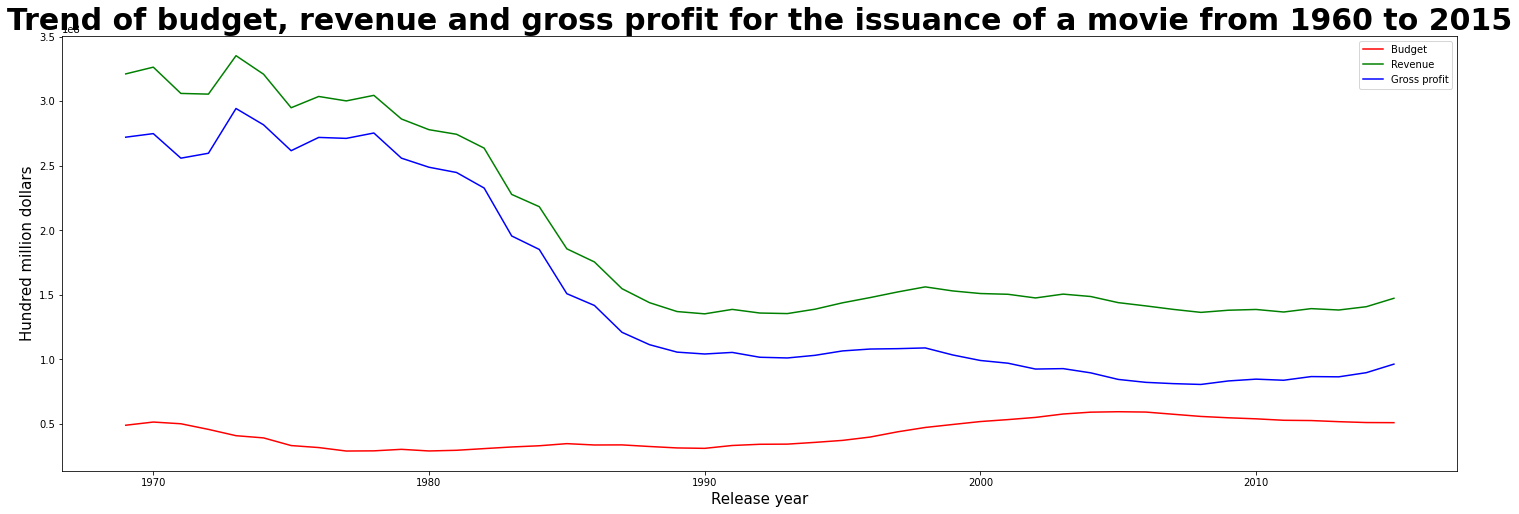

In [19]:
# Make a line plot to illustrate the trend of budget, revenue and gross profit for the issuance of a movie from 1960 to 2015

# Set the size of figure
plt.figure(figsize = (25,8))

# Plot individual line with custom colors and labels
plt.plot(sma_budget, label = 'Budget', color = 'red')
plt.plot(sma_revenue, label = 'Revenue', color = 'green')
plt.plot(sma_gross_profit, label = 'Gross profit', color = 'blue')

# Add legend and change figure size
plt.legend()


# Add axes labels and a title
plt.ylabel('Hundred million dollars', fontsize = 15)
plt.xlabel('Release year', fontsize = 15)
plt.title("Trend of budget, revenue and gross profit for the issuance of a movie from 1960 to 2015", fontsize = 30, fontweight  = 'bold')

plt.show()

1. According to chart 1 "Trend of budget, revenue and gross profit for the issuance of a movie from 1960 to 2015", it could be seen that both revenue and gross profit of the cinematic industry have experienced a significant drop compared to what was shown in 1970.

In [20]:
#Enrich new column "profitability" to identify how high, medium, low or even loss in the ability to earn profit from a movie.
#Identify the segment of gross profit margin
movies['gross_profit_margin'].describe().astype(int)

count     51166
mean       -819
std       12689
min     -561688
25%         -13
50%          51
75%          75
max          99
Name: gross_profit_margin, dtype: int32

- According to the description of "gross_profit_margin" column, we could seperate the dataset into 4 segments as follows:
    + High: from over or equal to 75% to 100%
    + Medium: from over or equal to 51% to under 75%
    + Low: from 0% to under 51%
    + Loss: under 0%

In [21]:
# Enrich a new column "profitability"
profit_labels = ['Loss','Low','Medium','High']
profit_bins = [-561688,0,51,75,99]

movies['profitability'] = pd.cut(movies['gross_profit_margin'], bins = profit_bins, labels = profit_labels)

In [22]:
# Create a dataset to count numbers of movies under each profitability segment
profit_segments = movies[['release_year','profitability']]
profitability = pd.pivot_table(profit_segments, index = 'release_year', columns  = 'profitability', aggfunc = len, fill_value = 0)

In [23]:
# Calculate the moving average for each profitability segment

sma_loss = moving_average(profitability, 'Loss', period = 10)
sma_high = moving_average(profitability, 'High', period = 10)
sma_medium = moving_average(profitability, 'Medium', period = 10)
sma_low = moving_average(profitability, 'Low', period = 10)

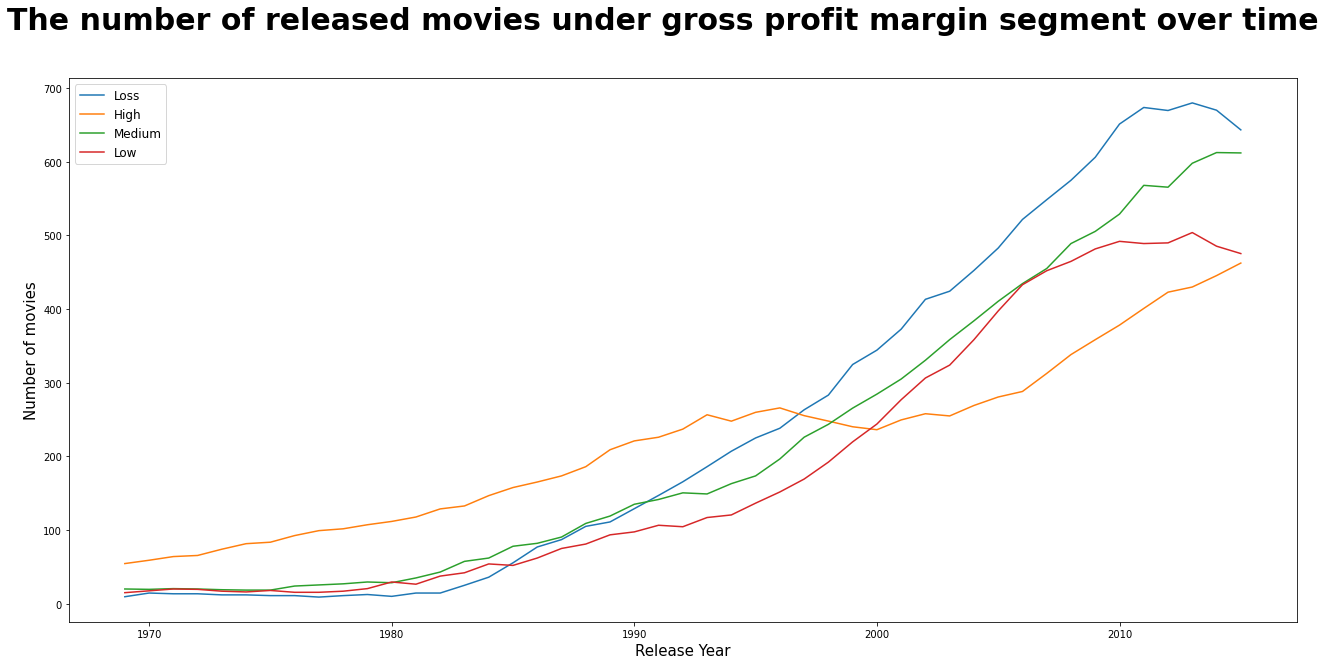

In [24]:
# Create a scatter plot to illustrate how each segment have changed during the period
fig, ax = plt.subplots(figsize = (22,10))
fig.suptitle('The number of released movies under gross profit margin segment over time', fontsize = 30, fontweight = 'bold')

ax.plot(sma_loss.index, sma_loss.values, label = "Loss")
ax.plot(sma_high.index, sma_high.values, label = "High")
ax.plot(sma_medium.index, sma_medium.values, label = "Medium")
ax.plot(sma_low.index, sma_low.values, label = "Low")
ax.legend(fontsize = 12)
ax.set_xlabel('Release Year', fontsize = 15)
ax.set_ylabel('Number of movies', fontsize = 15)


plt.show()

2. However, if associated with the figures illustrated in chart 2 "The number of released movies under gross profit margin segment over time", there are a different pictures:
    - The number of films of the period before 1990 is not much, the majority of the whole industry's revenue generated from a few certain classic films such as Star wars series, The Exorcist, Jaws, etc. So before the 90s, the movie industry's revenue depended on certain blockbuster movies.
    - There has been a burst in the number of movies issued since the 90s, but the average revenue and gross profit have remained stable, in contrast, the budget seems to have a slight decline during such period.
    - Also considering the gross profit margin in the second chart, the number of movies that generate high gross profit margin have recorded a stable surge for a long time from 1990 to 2015.

__*Question 2: Which are top 10 genres had succeeded in commercial aspects, in terms of revenue, gross profit and profit margin?*__

In [25]:
# Top 10 genres had succeeded in term of revenue
genres_revenue = movies.groupby('genres')['revenue_adj'].mean().astype('int64')
genres_revenue.sort_values(ascending = False, inplace = True)
genres_revenue = genres_revenue.head(10)
re_id = list(genres_revenue.index)

# Budget under genres
genres_budget = movies[movies['genres'].isin(re_id)]
genres_budget = genres_budget.groupby('genres')['budget_adj'].mean().astype('int64')

# Top 10 genres had succeeded in term of gross profit
genres_gross = movies.groupby('genres')['gross_profit'].mean().astype('int64')
genres_gross.sort_values(ascending = False, inplace = True)
genres_gross = genres_gross.head(10)

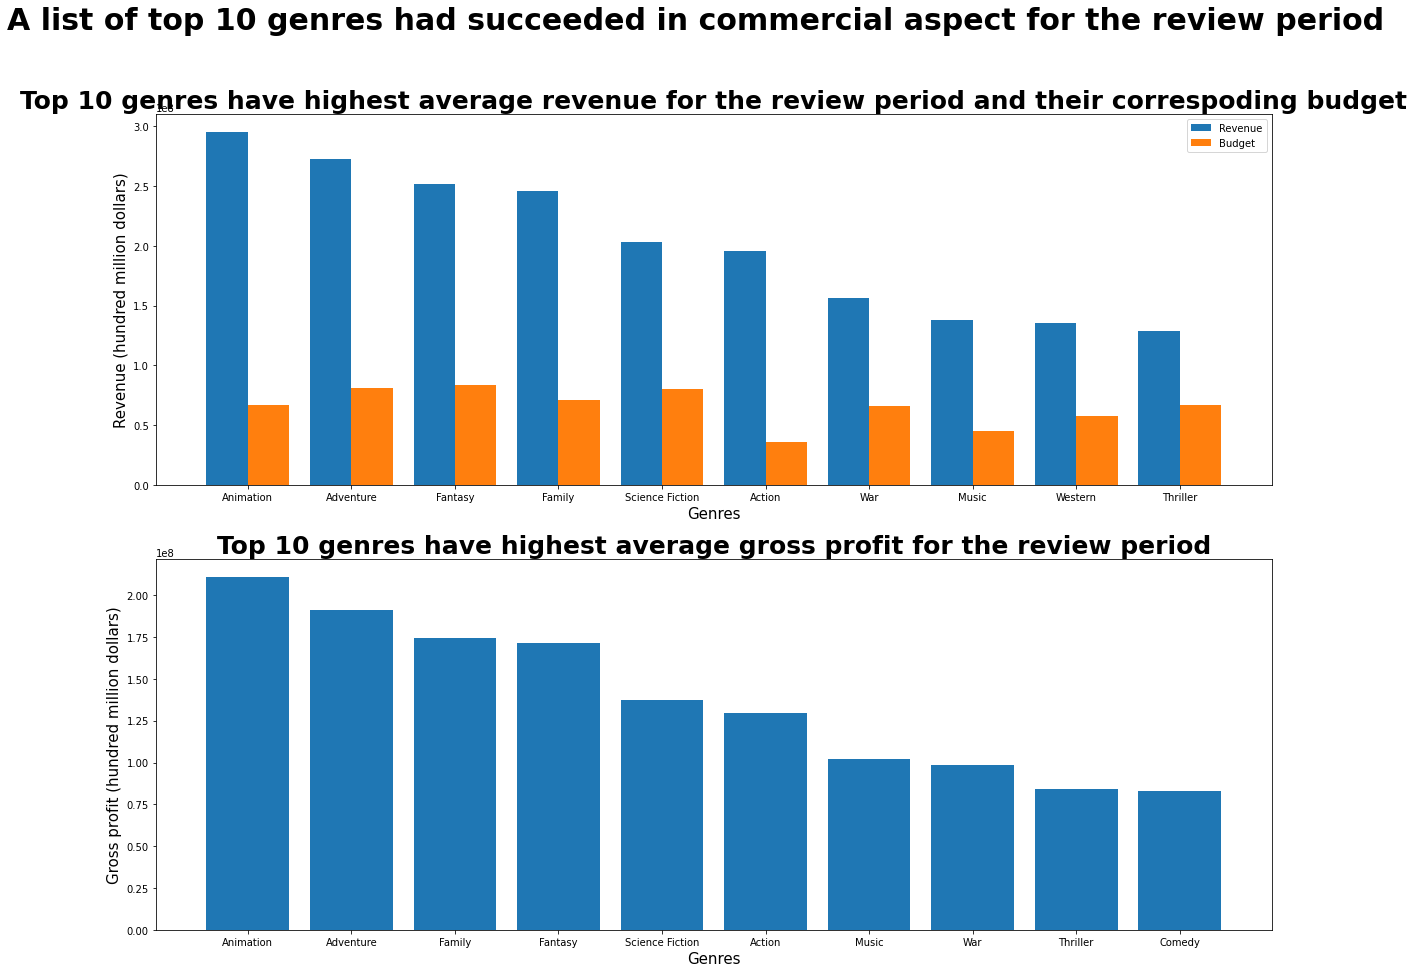

In [26]:
# Visual the top 10 genres in each term
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (20,15))
fig.suptitle("A list of top 10 genres had succeeded in commercial aspect for the review period", fontsize = 30, fontweight = 'heavy')



#Revenue bar chart
x = np.arange(len(list(genres_revenue.index))) #the label location 
width = 0.4
#width of the column

revenue_chart = ax1.bar(x - width/2, genres_revenue.values, width, label = "Revenue")
budget_chart = ax1.bar(x + width/2, genres_budget.values, width, label = "Budget")

ax1.set_title("Top 10 genres have highest average revenue for the review period and their correspoding budget", fontsize = 25, fontweight = 'bold' )
ax1.set_ylabel('Revenue (hundred million dollars)', fontsize = 15)
ax1.set_xlabel('Genres', fontsize = 15)
ax1.set_xticks(x,fonsize = 15)
ax1.set_xticklabels(genres_revenue.index)
ax1.legend()


ax2.bar(genres_gross.index,genres_gross.values )
ax2.set_title("Top 10 genres have highest average gross profit for the review period", fontsize = 25, fontweight = 'bold' )
ax2.set_ylabel('Gross profit (hundred million dollars)', fontsize = 15)
ax2.set_xlabel('Genres', fontsize = 15)
ax2.set_xticks(genres_gross.index,fonsize = 15)

plt.show()

- Animation and adventure are two genres that have generated the most revenue and gross profit among all genres in the cinematic industry.
- As shown in the chart, Fantasy, War and Western genres have their gross profit not in the same position as their corresponding revenue due to their budget being higher than other genres within the top 10. In which, Western genre is out of top 10 in term of gross profit and replaced by Comedy genre.

__*Question 3: How have the average runtime of movies varied over time?*__

- To understand how the average runtime of movies varies throughout the years to see the trend of the runtime from the part to the current

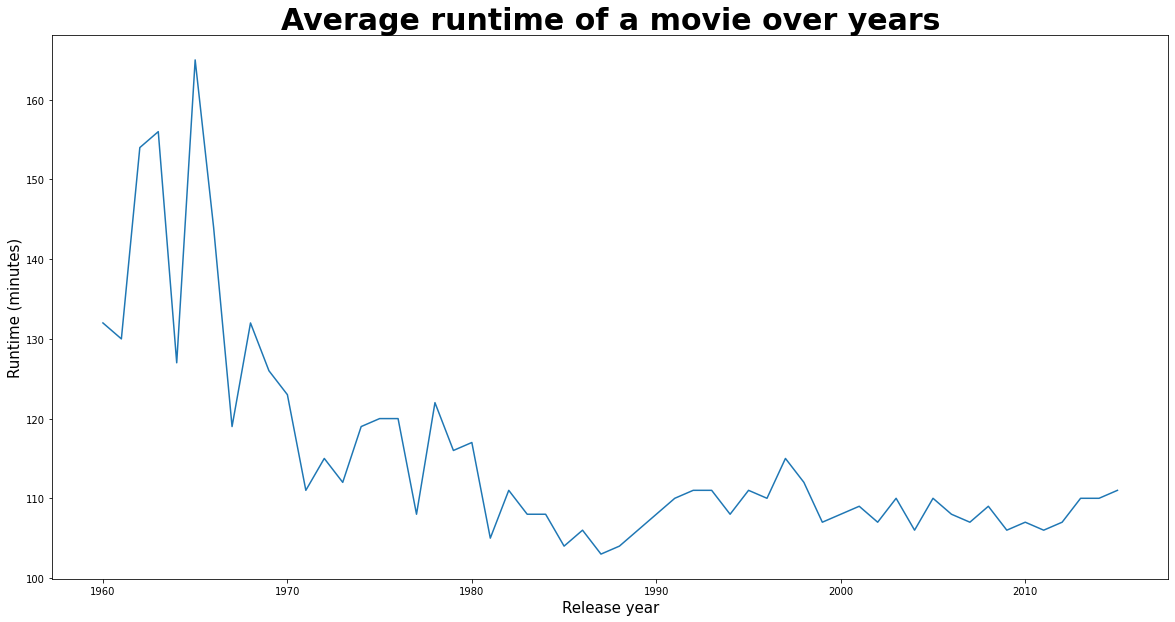

In [27]:
# Create a series to store the average runtime per movie over release year
runtime = movies.groupby('release_year')['runtime'].mean().astype("int64")

# Set the size of figure
plt.figure(figsize = (20,10))

# Plot a line chart
plt.plot(runtime.index,runtime.values)
plt.title('Average runtime of a movie over years', fontsize = 30, fontweight = 'bold')

# Add axes labels and a title
plt.xlabel('Release year', fontsize = 15)
plt.ylabel('Runtime (minutes)', fontsize = 15)
plt.show()

- The runtime of a movie has declined over time and remained stable in a range from 100 to 120 minutes since 1990.
- Accordingly, it could be seem that in the modern cinematic industry, the ideal runtime of a movie should be only from 100 to 120 minutes long.

__*Question 4: Does the vote effect the revenue of the movie?*__

- To understand how the vote score from the audiences would effect the revenue of a movies. This shall help the issuer to have a picture on the requirement of marketing tactic upon the issuance of a movie.

- According to the description of "vote_average" column, we could seperate the dataset into 3 segments as follows:
    + High: from over or equal to 6.7 to 8.4
    + Medium: from over or equal to 5.7 to under 6.7
    + Low: from 0 to under 5.7

In [28]:
# Create a new column "vote_segment"
vote_labels = ['Low', 'Medium','High']
vote_bins = [0,5.7,6.7,8.4]

movies['vote_segment'] = pd.cut(movies['vote_average'], bins  = vote_bins, labels = vote_labels)

In [29]:
# Create a dataset to count numbers of profitability under each vote segment
vote_dataset = movies[['vote_segment','profitability']]
vote_revenue = pd.pivot_table(vote_dataset, index = 'profitability', columns  = 'vote_segment', aggfunc = len, fill_value = 0)
vote_revenue

vote_segment,Low,Medium,High
profitability,,,
Loss,6172,6609,1429
Low,3486,5616,1765
Medium,3339,6650,3065
High,1600,6034,5116


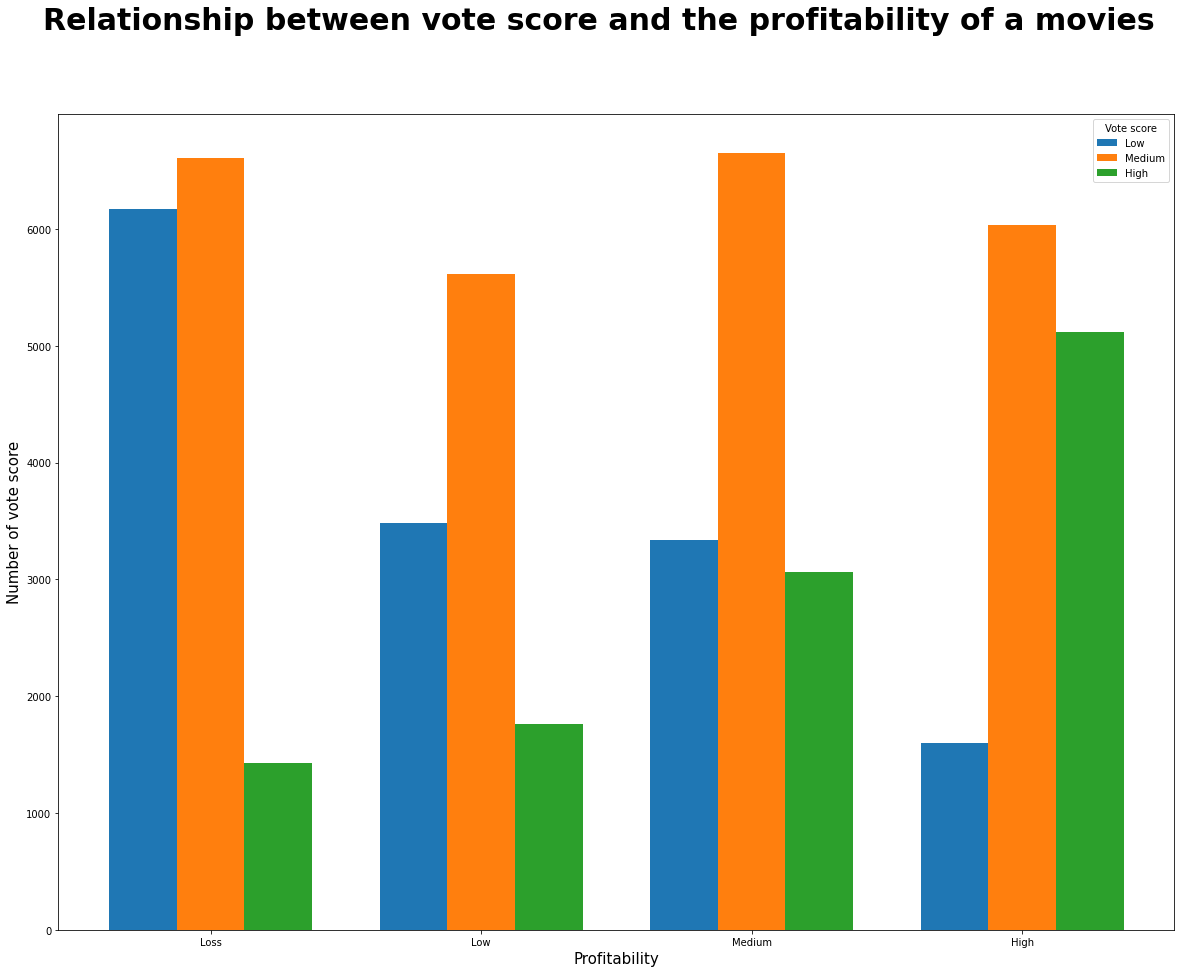

In [30]:
# Config the figure and axes
fig, ax = plt.subplots(figsize = (20,15))
fig.suptitle("Relationship between vote score and the profitability of a movies", fontsize = 30, fontweight = 'heavy')

#Revenue bar chart
x = np.arange(len(list(vote_revenue.index))) #the label location 
width = 0.25
#width of the column

low_chart = ax.bar(x  -  width, vote_revenue['Low'], width, label = "Low")
medium_chart = ax.bar(x, vote_revenue['Medium'], width, label = "Medium")
high_chart = ax.bar(x + width, vote_revenue['High'], width, label = "High")

ax.set_ylabel('Number of vote score', fontsize = 15)
ax.set_xlabel('Profitability', fontsize = 15)
ax.set_xticks(x,fonsize = 15)
ax.set_xticklabels(vote_revenue.index)
ax.legend(title = "Vote score")

According to the chart above, it could be seen that the higher in vote score gained, the higher in the profitability of a movie, in detail
    
- The number of low vote scores are highest for the movies that could not generate profit and go lowest for the movies with high profitability
- In contrast, the number of high vote scores are highest for the movies that generated high profit and gradually decrease in corresponding to the profitability of a movie.
    
As such, there is a relationship between vote score and the profitability of a movie where the higher in vote score that the movie could gain, the higher the chance that such a movie could generate more profit.

__*Question 5: Which are the top 10 directors who have most frequently directed high gross profit margin movies of all time?*__

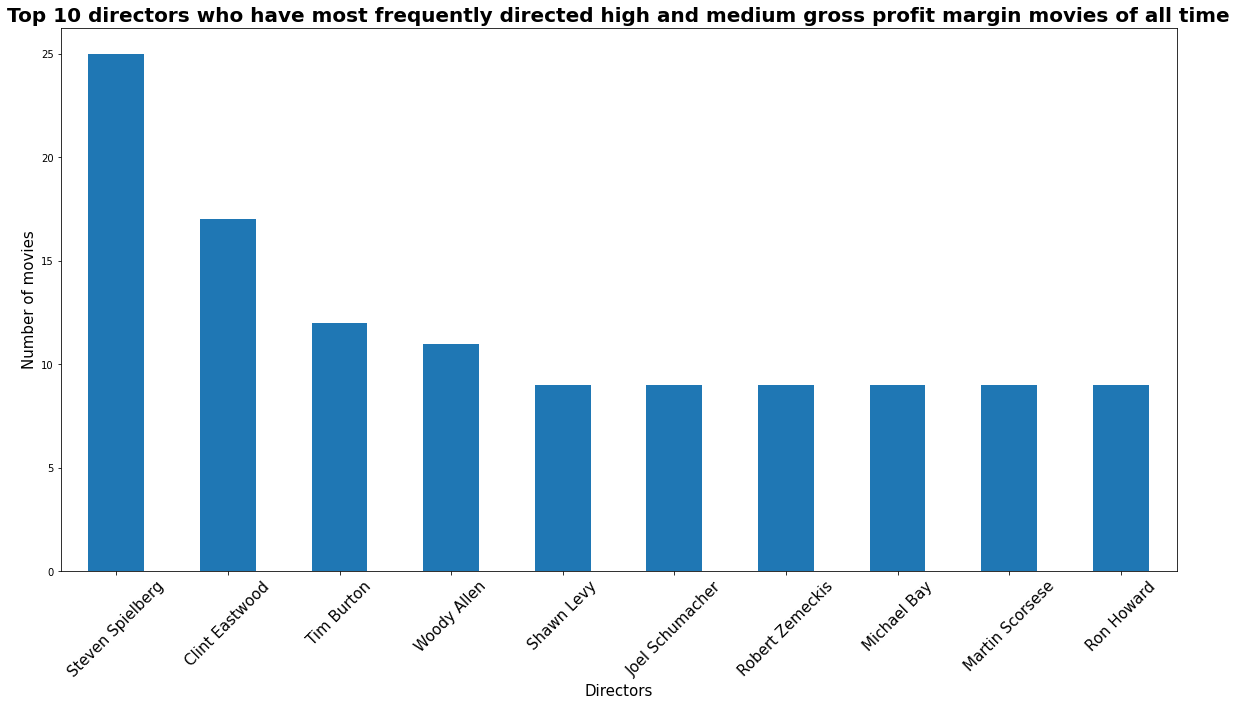

In [31]:
# Create dataset contains top 10 directors who have most frequently directed high and medium gross profit margin movies of all time
directors = movies.query('profitability == "High" or profitability == "Medium"')
directors = directors[['director','original_title','revenue_adj', 'gross_profit']].drop_duplicates()

frequent_director = directors['director'].value_counts().sort_values(ascending = False).head(10)

# Set the size of figure
plt.figure(figsize = (20,10))
plt.title("Top 10 directors who have most frequently directed high and medium gross profit margin movies of all time", fontsize = 20, fontweight = 'bold')
plt.ylabel('Number of movies', fontsize = 15)
plt.xlabel('Directors', fontsize = 15)
plt.xticks(fontsize = 15)


# Create a bar plot to visualize top 10 directors
frequent_director.plot(kind = 'bar', rot = 45)


plt.show()


*_Please refer to the comment after the second chart_*

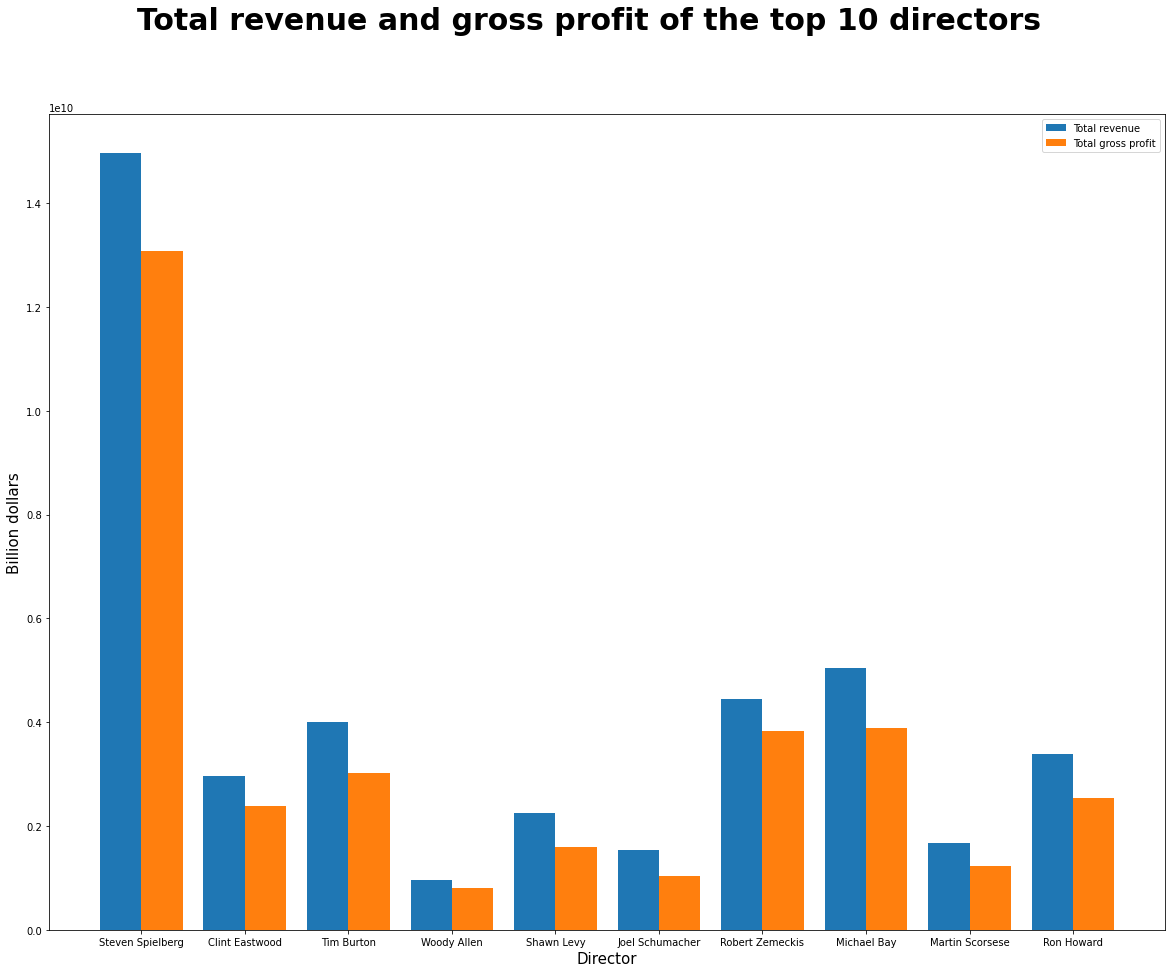

In [32]:
# Create a plot to present the average revenue and gross profit of the top 10 directors

# Create datasets to be presented on the plot
director_order = frequent_director.index
top_directors = list(frequent_director.index)
commercial_directors = directors[directors['director'].isin(top_directors)]

# Total revenue of each director
director_revenue = commercial_directors.groupby('director')['revenue_adj'].sum()[director_order]

#Total gross profir of each director
director_profit = commercial_directors.groupby('director')['gross_profit'].sum()[director_order]

# Visualize the commercial performance of the top 10 directors
fig, ax = plt.subplots(figsize = (20,15))
fig.suptitle("Total revenue and gross profit of the top 10 directors", fontsize = 30, fontweight = 'heavy')



# Create a bar chart
x = np.arange(len(list(director_revenue.index))) #the label location 
width = 0.4 #width of the column

dire_revenue_chart = ax.bar(x - width/2, director_revenue.values, width, label = "Total revenue")
dire_profit_chart = ax.bar(x + width/2, director_profit.values, width, label = "Total gross profit")

ax.set_ylabel('Billion dollars', fontsize = 15)
ax.set_xlabel('Director', fontsize = 15)
ax.set_xticks(x,fonsize = 15)
ax.set_xticklabels(director_revenue.index)
ax.legend()

plt.show()

- Steven Spielberg could be considered the most successful director of all time because he has the highest number of commercially successful films, and also the highest revenue and gross profit generated among directors.
- Right after is Clint Eastwood in the number of successful movies, however, in the aspect of commercial, the second place director would go for Michael Bay with his revenue and gross profit generated from his movies are only after Steven.

__*Question 6: Which are the top 10 frequent actors/actresses and their corresponding commercial performance?*__

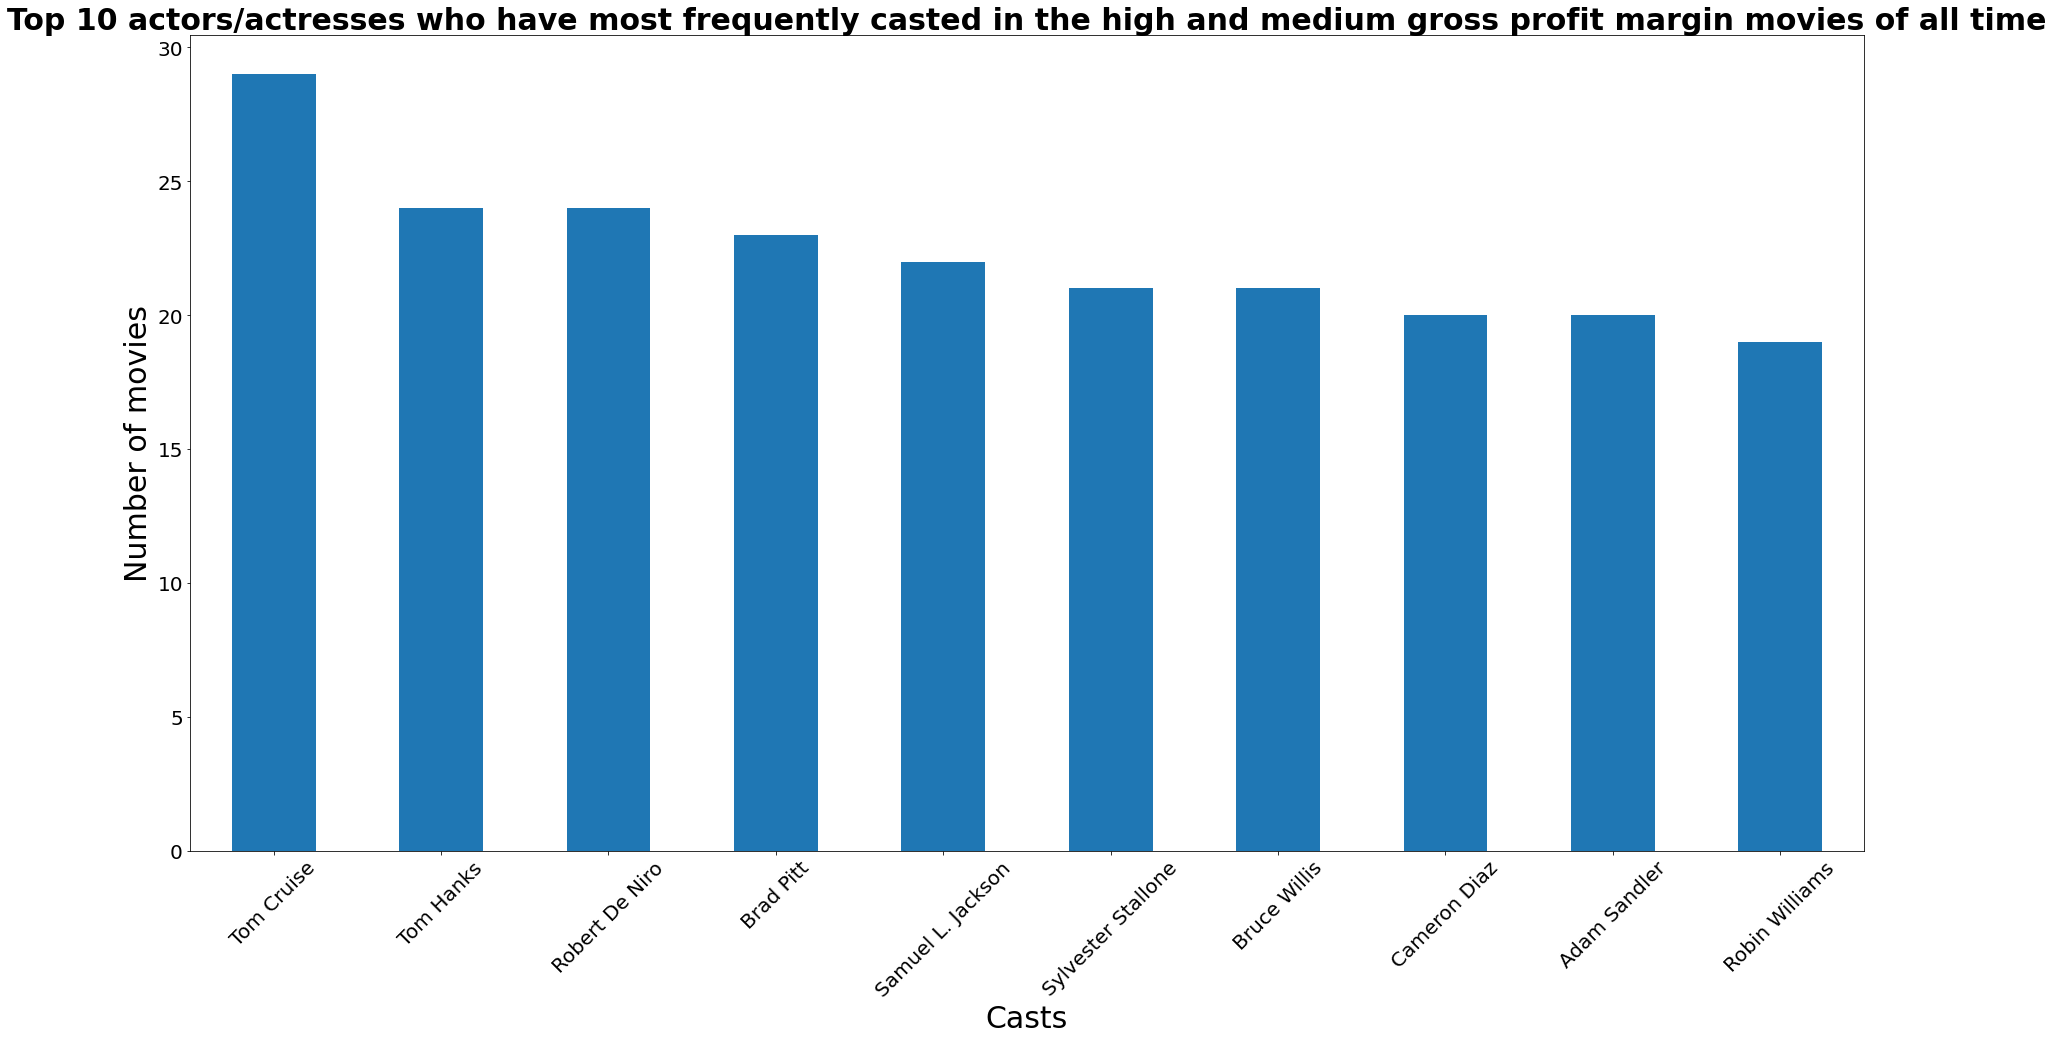

In [33]:
# Create dataset contains top 10 actors/actresses who have most frequently casted in the high gross profit margin movies of all time
casts = movies.query('profitability == "High" or profitability == "Medium"')
casts = casts[['cast','original_title','revenue_adj', 'gross_profit']].drop_duplicates()

frequent_casts = casts['cast'].value_counts().sort_values(ascending = False).head(10)

# Set the size of figure
plt.figure(figsize = (30,15))
plt.title("Top 10 actors/actresses who have most frequently casted in the high and medium gross profit margin movies of all time", fontsize = 30, fontweight = 'bold')
plt.ylabel('Number of movies', fontsize = 30)
plt.xlabel('Casts', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


# Create a bar plot to visualize top 10 actors/actresses
frequent_casts.plot(kind = 'bar', rot = 45)


plt.show()


*_Please refer to the comment after the second chart_*

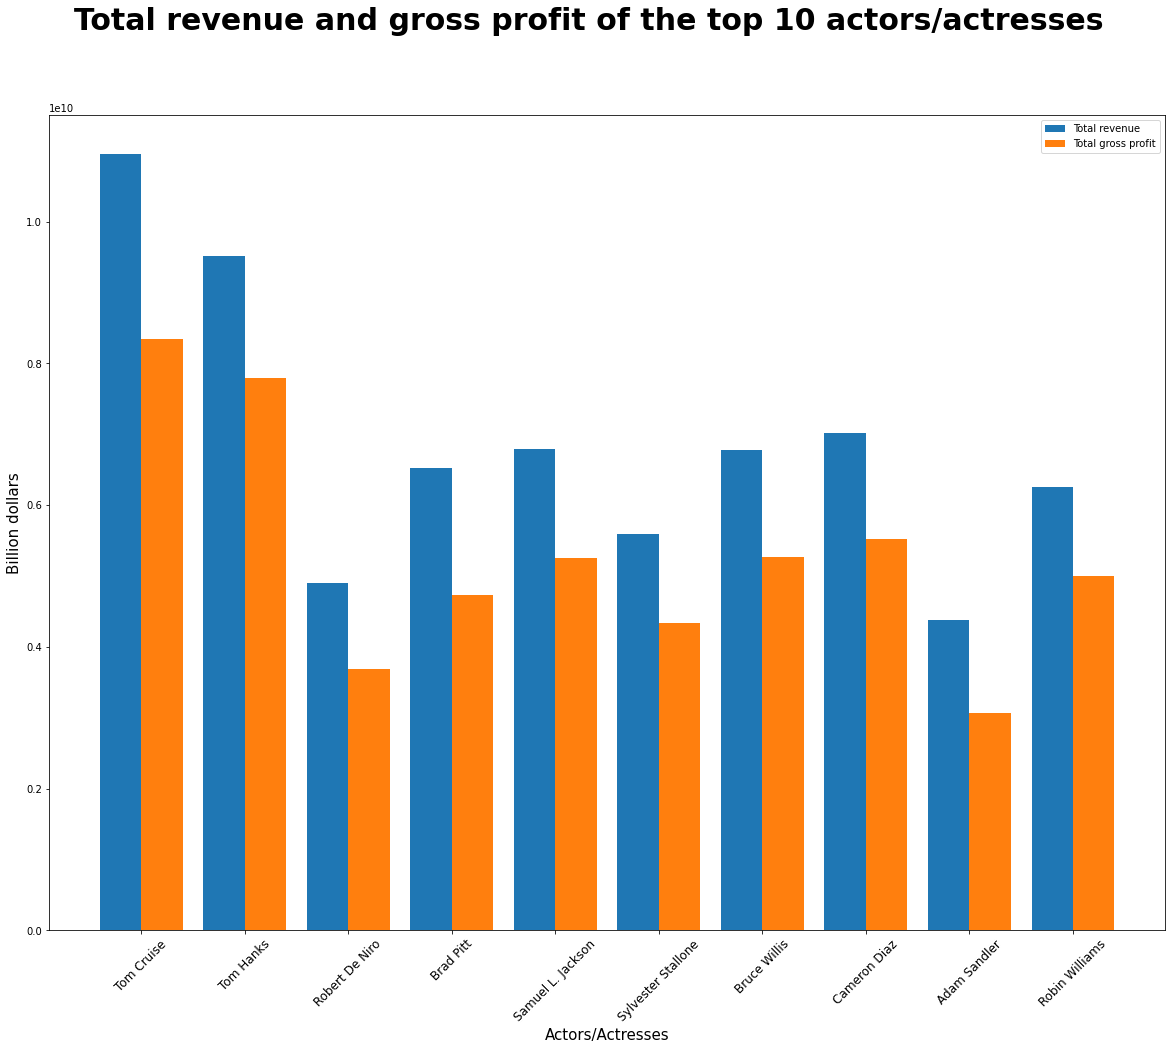

In [34]:
# Create a plot to present the average revenue and gross profit of the top 10 actors/actresses

# Create datasets to be presented on the plot
cast_order = frequent_casts.index
top_casts = list(frequent_casts.index)
commercial_casts = casts[casts['cast'].isin(top_casts)]

# Total revenue of each actor/actress
cast_revenue = commercial_casts.groupby('cast')['revenue_adj'].sum()[cast_order]

#Total gross profir of each actor/actress
cast_profit = commercial_casts.groupby('cast')['gross_profit'].sum()[cast_order]

# Visualize the commercial performance of the top 10 actors/actresses
fig, ax = plt.subplots(figsize = (20,15))
fig.suptitle("Total revenue and gross profit of the top 10 actors/actresses", fontsize = 30, fontweight = 'heavy')



# Create a bar chart
x = np.arange(len(list(cast_revenue.index))) #the label location 
width = 0.4 #width of the column

cast_revenue_chart = ax.bar(x - width/2, cast_revenue.values, width, label = "Total revenue")
cast_profit_chart = ax.bar(x + width/2, cast_profit.values, width, label = "Total gross profit")

ax.set_ylabel('Billion dollars', fontsize = 15)
ax.set_xlabel('Actors/Actresses', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(cast_revenue.index, rotation = 45, fontsize = 12)
ax.legend()

plt.show()

- Tom Cruise and Tom Hanks are two actors dominating the cast list while they not only participated in the most successful movies but also their revenue and gross profit generated from those movies are the highest among all.
- Cameron Diaz is the only actress on the list, even though the number of successful movies that have her participation is in the top 9, but the revenue and gross profit generated from her movies are recorded as the third highest on the list.

# Limitation

- There are many failure in data of budget and revenue column where it could not be identified precisely which could be leveraged for the analysis. As a result, this would lead to the fact that the analysis relating to gross profit and gross profit margin do not illustrate the actual picture of the cinematic industry.

- The cast & genres columns have the pipe (|) separator that needed to be reconstructured to get the right structure of cast and genres before any analysis.

- The major difficulty here is that I do not have sufficient domain knowledge in cinematic industry, all the analysis was purely based on the information provided and could not generate more insight for a particular requirement.

# Conclusion

- Since 1990, the cinematic industry has experienced a burst in the number of movies produced in 1 year, however, instead of the strong volatility in commercial indexes for the period before 1990, they now seem stable and still develop in revenue, gross profit, and gross profit margin.
- On average, Animation and adventure are two genres that have generated the most revenue and gross profit among all genres in the cinematic industry.
- The runtime of a movie varies strongly over years, however, in the modern cinematic industry, the ideal runtime of a movie should be only from 100 to 120 minutes long.
- In the modern cinematic industry, marketing tactic plays a crucial role and directly effect the profitability of a movie, because, there is a relationship between vote score and the profitability of a movie where the higher in vote score that the movie could gain, the higher the chance that such a movie could generate more profit.
- Steven Spielberg could be considered the most successful director of all time. Right after is Clint Eastwood, but for the commercial aspect, it would be Michael Bay.
- Tom Cruise and Tom Hank are two super star because their movies frequently success in commercial aspect and generate the most profit among industry. 